In [1]:
import json
import os

depth = 2
directory_path = f'./apache-airflow/airflow/cleaned_data_{depth}'
data = []

for file in os.scandir(directory_path):
    try:
        with open(file.path, 'r') as f: 
            data.extend(json.load(f))

    except Exception as e:
        print(f"Error reading {file.name}: {e}")

In [2]:
og_len = len(data)
og_len

175143

In [3]:
import pandas as pd

data = pd.DataFrame(data)
data = data.sort_values(by='layer', ascending=True)
data


,title,sub_title,text,category,layer
175142,Young subgroup,None,"Inmathematics, theYoung subgroupsof thesymmetr...",Combinatorics,1
28270,Envelope (category theory),Examples,In the following list all envelopes can be def...,Category theory,1
28269,Envelope (category theory),Nets of epimorphisms and functoriality,Suppose that to each objectX\in\operatorname{O...,Category theory,1
28268,Envelope (category theory),Definition,"SupposeKis a category,Xan object inK, and\Omeg...",Category theory,1
28267,Envelope (category theory),Introduction,Incategory theoryand related fields of mathema...,Category theory,1
...,...,...,...,...,...
63777,Armadillo (C++ library),Example in C++ 98,Here is another trivial example in C++ 98:#inc...,Numerical analysis,2
63778,Matrix multiplication algorithm,Introduction,Becausematrix multiplicationis such a central ...,Numerical analysis,2
63779,Matrix multiplication algorithm,Iterative algorithm,Thedefinition of matrix multiplicationis that ...,Numerical analysis,2
63772,Bareiss algorithm,Overview,"Determinantdefinition has only multiplication,...",Numerical analysis,2


In [4]:
data = data.drop_duplicates(subset=['category', 'text'])
print(f'{len(data)/og_len:.2%} of df remained')

86.35% of df remained


In [5]:
df_counts = data["category"].value_counts()
df_counts.to_frame().T

category,Applied mathematics,Mathematical logic,Dynamical systems,Numerical analysis,Combinatorics,Topology,Linear algebra,Number theory,Analysis,Algebra,...,Set theory,Order theory,Trigonometry,Chaos theory,Fractals,Statistics,Linear programming,Model theory,Multi-dimensional geometry,Probability and statistics
count,16268,9421,9141,9031,8963,8014,7895,7749,7652,7201,...,2607,2058,1644,1539,1432,1162,996,969,954,140


In [6]:
data.loc[data['category'] == 'Probability and statistics', 'category'] = 'Statistics'
df_counts = data["category"].value_counts()
df_counts.to_frame().T

/tmp/ipykernel_6798/1238885651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['category'] == 'Probability and statistics', 'category'] = 'Statistics'


category,Applied mathematics,Mathematical logic,Dynamical systems,Numerical analysis,Combinatorics,Topology,Linear algebra,Number theory,Analysis,Algebra,...,Calculus,Set theory,Order theory,Trigonometry,Chaos theory,Fractals,Statistics,Linear programming,Model theory,Multi-dimensional geometry
count,16268,9421,9141,9031,8963,8014,7895,7749,7652,7201,...,3396,2607,2058,1644,1539,1432,1302,996,969,954


In [7]:
all_labels = list(data['category'].unique())
all_labels

['Combinatorics',
 'Category theory',
 'Set theory',
 'Game theory',
 'Multi-dimensional geometry',
 'Analysis',
 'Applied mathematics',
 'Calculus',
 'Numerical analysis',
 'Complex analysis',
 'Trigonometry',
 'Group theory',
 'Arithmetic',
 'Topology',
 'Statistics',
 'Geometry',
 'Graph theory',
 'Number theory',
 'Linear algebra',
 'Model theory',
 'Dynamical systems',
 'Algebraic geometry',
 'Chaos theory',
 'Fractals',
 'Algebraic topology',
 'Order theory',
 'Linear programming',
 'Mathematical logic',
 'Algebra']

In [8]:
data = data.groupby("text").agg({
    "category": lambda x: list(set(x)),  # collect unique categories
    "title": "first",
    "sub_title": "first"}).reset_index()

data

,text,category,title,sub_title
0,,[Algebraic topology],Template:Infobox knot theory,None
1,,[Numerical analysis],Verlet integration,Literature
2,"\nIncorrect code, p[i] is overwritten used in...",[Applied mathematics],Binomial options pricing model,Method
3,...,"[Number theory, Linear algebra]",GCD matrix,Definition
4,0 1 2 3 4 5 6 7 8 9 sum 1 0 1 1 2 1...,"[Group theory, Combinatorics, Topology, Dynami...",Cycles and fixed points,Some values
...,...,...,...,...
107062,"“The farthest planet from the sun”, as it appe...",[Mathematical logic],Frege–Church ontology,Resolution
107063,•Length.The length is the number of evaluation...,[Applied mathematics],Locally recoverable code,Parameters of Tamo–Barg codes
107064,"″On the Nature of Mathematical Truth""and ""Geom...",[Mathematical logic],Carl Gustav Hempel,Articles
107065,将棋ぶらうざQ (Shogi Browser Q) is a free cross-plat...,[Game theory],Computer shogi,Shogi Browser Q


In [9]:
data['length'] = data['text'].apply(lambda x: len(x.split()))
data.describe(include='all')

,text,category,title,sub_title,length
count,107067,107067,107067,98182,107067.000000
unique,107067,813,20614,57326,NaN
top,꜔(U+A714) Modifier Letter Mid Left-Stem Tone B...,[Applied mathematics],List of fellows of the American Statistical As...,Introduction,NaN
freq,1,11286,108,11712,NaN
mean,NaN,NaN,NaN,NaN,168.361979
std,NaN,NaN,NaN,NaN,192.414421
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,65.000000
50%,NaN,NaN,NaN,NaN,124.000000
75%,NaN,NaN,NaN,NaN,219.000000


In [10]:
percentiles = data['length'].quantile([0.5, 0.9, 0.95, 0.99])
percentiles

0.50    124.0
0.90    337.0
0.95    443.0
0.99    766.0
Name: length, dtype: float64

In [11]:
data = data[data['length'] <= percentiles[0.95]]
data = data[data['length'] >= 10]
print(f'{len(data)/og_len:.2%} of df remained')
data.describe(include='all')

57.04% of df remained


,text,category,title,sub_title,length
count,99898,99898,99898,91511,99898.000000
unique,99898,780,20015,53513,NaN
top,꜔(U+A714) Modifier Letter Mid Left-Stem Tone B...,[Applied mathematics],List of fellows of the American Statistical As...,Introduction,NaN
freq,1,10437,93,11387,NaN
mean,NaN,NaN,NaN,NaN,143.271647
std,NaN,NaN,NaN,NaN,98.413393
min,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,65.000000
50%,NaN,NaN,NaN,NaN,120.000000
75%,NaN,NaN,NaN,NaN,202.000000


In [12]:
data["category"].apply(lambda x : len(x)).value_counts().to_frame().T

category,1,2,3,4,5,6,7
count,69006,23273,5490,1625,375,120,9


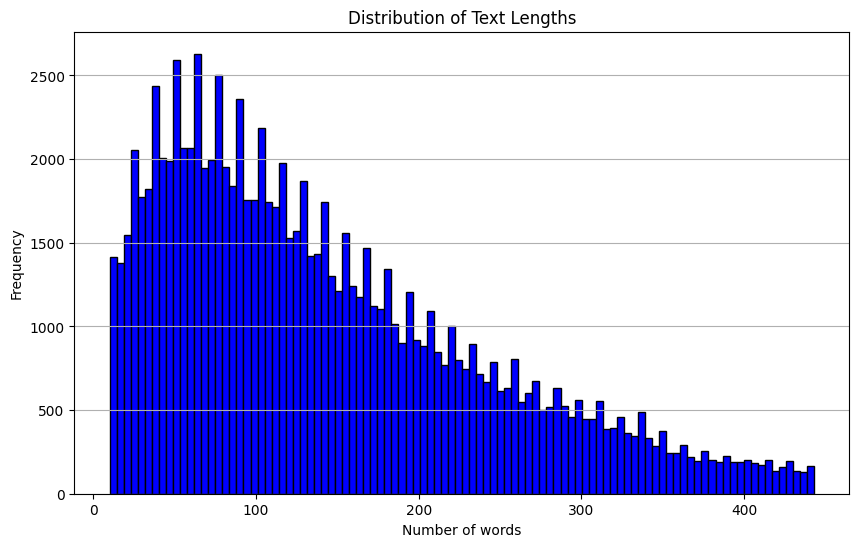

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['length'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [16]:
import spacy

# Load spaCy English model (disable parser/ner for speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def normalize_text_spacy(row, remove_stopwords=True, remove_punct=True):
    text = row['title']
    if row['sub_title']:
        text = text + ' ' + row['sub_title']
    else:
        pass

    text = text + ' ' + row['text']

    doc = nlp(text)

    tokens = []
    for token in doc:
        # Skip stopwords if requested
        if remove_stopwords and token.is_stop:
            continue
        # Skip punctuation if requested
        if remove_punct and token.is_punct:
            continue
        if token.like_url or token.like_email:
            continue
        # Keep the lowercase version
        tokens.append(token.text.lower())

    return pd.Series({'text': text, 'input': " ".join(tokens), 'labels': row['category'], 'length': len(tokens)})

In [17]:
data_mod = data.apply(normalize_text_spacy, axis=1)
data_mod.head()

,text,input,labels,length
2,Binomial options pricing model Method \nIncor...,binomial options pricing model method \n inco...,[Applied mathematics],179
3,GCD matrix Definition ...,gcd matrix definition ...,"[Number theory, Linear algebra]",51
4,Cycles and fixed points Some values 0...,cycles fixed points values 0 1 2 3 4...,"[Group theory, Combinatorics, Topology, Dynami...",108
5,Primorial Table of primorials Primorial p...,primorial table primorials primorial pri...,"[Combinatorics, Number theory]",175
6,Open energy system models RAMP Project\n ...,open energy system models ramp project \...,"[Applied mathematics, Numerical analysis]",197


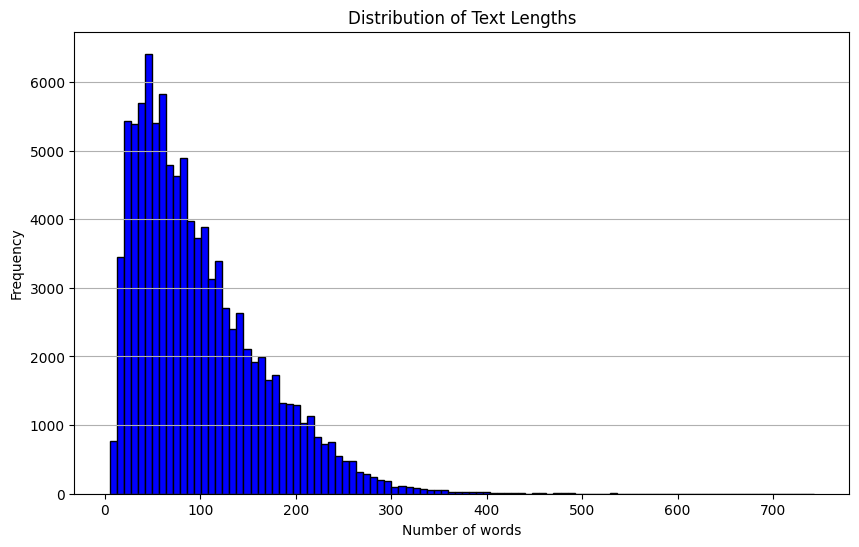

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_mod['length'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([all_labels])
mlb.transform([["Algebra", "Calculus"], ["Game theory"]])

array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]])

In [20]:
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split

def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["labels"])
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels, test_size)
    return df.iloc[ind_train[:,0]], df.iloc[ind_test[:,0]]

In [21]:
data_mod.drop(['text', 'length'], axis=1, inplace=True)

np.random.seed(42)
train_df, temp_df = balanced_split(data_mod, test_size=0.4)
valid_df, test_df = balanced_split(temp_df, test_size=0.5)

In [22]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df, preserve_index=False)
valid_ds = Dataset.from_pandas(valid_df, preserve_index=False)
test_ds = Dataset.from_pandas(test_df, preserve_index=False)

ds = DatasetDict({
    'train': train_ds,
    'valid': valid_ds,
    'test': test_ds
})

In [23]:
ds

DatasetDict({
    train: Dataset({
        features: ['input', 'labels'],
        num_rows: 60043
    })
    valid: Dataset({
        features: ['input', 'labels'],
        num_rows: 19902
    })
    test: Dataset({
        features: ['input', 'labels'],
        num_rows: 19953
    })
})

In [24]:
from huggingface_hub import login

login()

In [25]:
repo_id = "noor-zalouk/wiki-math-articles-multilabel"
ds.push_to_hub(repo_id)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/61 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|1         |  525kB / 28.3MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   6%|5         |  525kB / 9.52MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   6%|5         |  525kB / 9.47MB            

CommitInfo(commit_url='https://huggingface.co/datasets/noor-zalouk/wiki-math-articles-multilabel/commit/c025d4aeb2d21c40ef2e258241ad8d9feb1dd215', commit_message='Upload dataset', commit_description='', oid='c025d4aeb2d21c40ef2e258241ad8d9feb1dd215', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/noor-zalouk/wiki-math-articles-multilabel', endpoint='https://huggingface.co', repo_type='dataset', repo_id='noor-zalouk/wiki-math-articles-multilabel'), pr_revision=None, pr_num=None)